## Question 01

![Alt text](q1_1.png)

![Alt text](q1_2.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#write the x and y values from the figure
df = pd.DataFrame(data=np.array([[5,10,15,20],[3.8,4.3,3.0,0]]).T, columns = ['x','y'])
#to add the x^2 column
df['x2'] = df['x']**2
#to make the matrix X by adding the column for bias
X = np.append(np.ones(4).reshape(-1,1),df[['x','x2']].values,1)

## To calculate A and b (Solving using normal Equation)
A = np.matmul(X.T,X)
b = np.matmul(X.T,df['y'].values)

#to fit and find the values of B0, B1 and B2
B0,B1,B2 = np.linalg.solve(A,b)
print('The value of the B0, B1, and B2 are',np.round(B0,2),np.round(B1,2),np.round(B2,2))

The value of the B0, B1, and B2 are 1.58 0.62 -0.03


In [2]:
# this will produce the y_hat given the x
def predict(x,B0=B0,B1=B1,B2=B2):
    return B0+B1*x+B2*x**2

#to get predictions
df['y_hat'] = df['x'].apply(lambda x:predict(x))

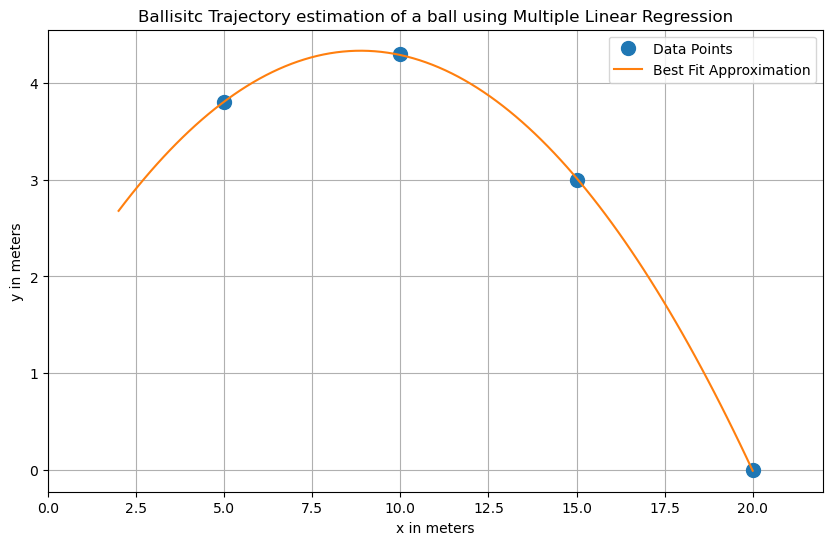

In [3]:
#To plot the trajectory
fig = plt.figure(figsize=(10,6))
plt.plot(df['x'],df['y'],'o',markersize=10,label='Data Points')

# to have a nice smooth best fit curve
dummy_x = np.linspace(2,20,100)
dummy_y = [predict(val) for val in dummy_x]
plt.plot(dummy_x,dummy_y,label='Best Fit Approximation');

# to make plot nicer
plt.xlim([0,22]);
plt.xlabel('x in meters');
plt.ylabel('y in meters');
plt.title('Ballisitc Trajectory estimation of a ball using Multiple Linear Regression');
plt.legend();
plt.grid('on')

In [4]:
#now to find the value of y_0, v_0, theta_0

#values given from the data
g = 9.81
y_0 = B0
theta_0 = np.arctan(B1)
v_0 = np.sqrt(-g/(2*B2*np.cos(theta_0)**2))

In [5]:
print('The estimated values of y_0, theta_0, and v_0 are',np.round(y_0,2),np.round(np.rad2deg(theta_0),2),np.round(v_0,2))

The estimated values of y_0, theta_0, and v_0 are 1.58 31.84 13.94


In [6]:
#To get the relative error
def give_relative_error(measured,real):
    return np.round(np.absolute(measured-real)/real,3)

In [7]:
print('The relative error in y_0, theta_0 and v_0 are',give_relative_error(y_0,1.8),\
      give_relative_error(np.rad2deg(theta_0),30),give_relative_error(v_0,14),'respectively')

The relative error in y_0, theta_0 and v_0 are 0.125 0.061 0.005 respectively


## Question 2

For the below dataset. Try to build an ensemble model using logistic regression. You have to select subset of features and instances and fit a logistic regression model. You can take number of logistic regression models to be 10. To get final output, perform soft voting (take the average of the probabilities and then apply the thereshold)

Note: Sklearn is allowed for this part

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

column_names = [
    "pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin",
    "bmi", "diabetes_pedigree_function", "age", "outcome"
]

# Load the dataset into a pandas DataFrame
diabetes_data = pd.read_csv('diabetes.csv')

In [9]:
X = diabetes_data.iloc[:,:-1].values
y = diabetes_data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Since we have 614 instances let's choose each learner model is trained using 200 instances and 4 features

models = [] 
selected_features = [] #to store features used for each learner model

for i in range(10):
    #Create a random subset of features
    subset_features = np.random.choice(range(X_train.shape[1]), size=4, replace=False) #to retrieve features for testing
    X_subset_features = X_train[:, subset_features]
    selected_features.append(subset_features)

    #Create a random subset of instances
    subset_instances = np.random.choice(range(X_train.shape[0]), size=200, replace=True)
    X_subset = X_subset_features[subset_instances, :]
    y_subset = y_train[subset_instances]

    #Create and fit a logistic regression model
    model = LogisticRegression()
    model.fit(X_subset, y_subset)

    #Append the trained model to the list
    models.append(model)

In [11]:
#now to create soft voting module

#make prediction on test set
probabilities = np.array([model.predict_proba(X_test[:, features]) for model, features in zip(models, selected_features)])

#calculate the mean probabilities
average_probabilities = np.mean(probabilities, axis=0)

#make final decision based on the final averaged probabilities
final_prediction = np.argmax(average_probabilities, axis=1)

In [12]:
#To get accuracy of the ensemble model
accuracy_score(y_test, final_prediction)

0.7337662337662337

In [13]:
#What if  we had only used a single Log REg model instead of ensemble
single_log = LogisticRegression(max_iter=1000)
single_log.fit(X_train, y_train)
single_pred = single_log.predict(X_test)
accuracy_score(y_test, single_pred)

0.7467532467532467

We can see for the same amount of data, ensemble model gave the better performance

## Question 3

For the below data, fit a SVM model to dataset. Later, transform the features using PCA to 2-D and then perform SVM. Compare the performance between the two approaches. Do not forget to scale the features before applying PCA. (Use Sklearn)

In [33]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_train,y_train)
preds = svm.predict(X_test)
accuracy_score(y_test,preds)

0.8055555555555556

In [36]:
#Now after doing PCA

#To scaling of the data
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

#apply PCA
pca = PCA(n_components=2)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)


svm = SVC()
svm.fit(X_train_scaled,y_train)
preds = svm.predict(X_test_scaled)
accuracy_score(y_test,preds)

1.0

We see here in this case applying PCA improved the performance